# Figure with the trial paths for each session

A quick way to see the trial paths 

In [7]:
import pandas as pd
import numpy as np
import os.path
import shutil
from autopipy.project import Project
from autopipy.session import Session
from autopipy.trial import Trial
from autopipy.navPath import NavPath
import importlib

import autopipy
importlib.reload(autopipy.project)
importlib.reload(autopipy.session)
importlib.reload(autopipy.navPath)
importlib.reload(autopipy.trial)

from autopipy.session import Session
from autopipy.project import Project
from autopipy.trial import Trial
from autopipy.navPath import NavPath
importlib.reload(autopipy.trial)
from autopipy.trial import Trial

In [8]:
projectName="autopi_behavior_2021"
dataPath="/adata/projects/autopi_behavior_2021"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)
fn=myProject.dataPath+"/testing_sessions"
print("Reading " + fn)
sessionNamesTesting = pd.read_csv(fn) # this will be a pandas dataframe
myProject.createSessionList(sessionNameList=sessionNamesTesting.sessionName.to_list())
print("We have {} recording sessions".format(len(myProject.sessionList)))

Project name: autopi_behavior_2021
dataPath: /adata/projects/autopi_behavior_2021
dlcModelPath: /adata/models
Reading /adata/projects/autopi_behavior_2021/testing_sessions
We have 61 recording sessions


mn7732-18122019-1522 trial segmentation
Number of trials : 100
Lenght of mouseLeverPosi: 97317
Lenght of videoLog: 97317
mn7732-18122019-1522_85, mouse not in the lever zone when the lever was pressed
self.valid set to False
searchTotal :empty NavPath created
searchArena :empty NavPath created
searchArenaNoLever :empty NavPath created
homingTotal :empty NavPath created
homingPeri :empty NavPath created
homingPeriNoLever :empty NavPath created
Saving trialPaths in /adata/projects/autopi_behavior_2021/mn7732/mn7732-18122019-1522/mn7732-18122019-1522_trialPaths.pdf


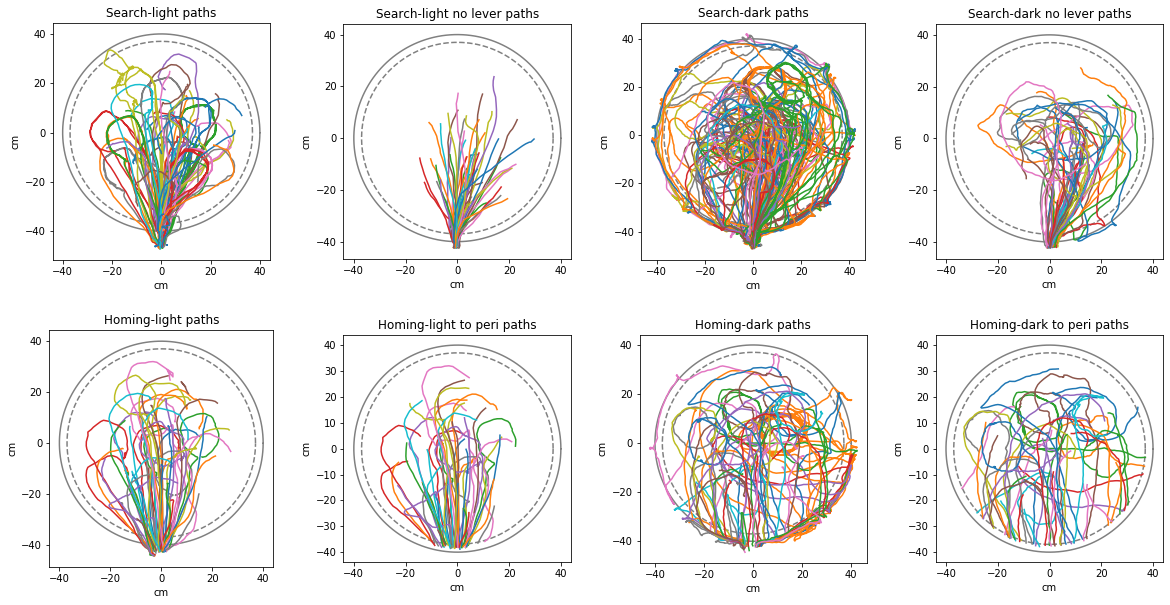

In [9]:
ses = myProject.sessionList[40]
ses.extractTrialFeatures()
ses.trialPathFigure()

/adata/projects/autopi_behavior_2021/mn7732/mn7732-18122019-1522/mn7732-18122019-1522_trialPaths.pdf


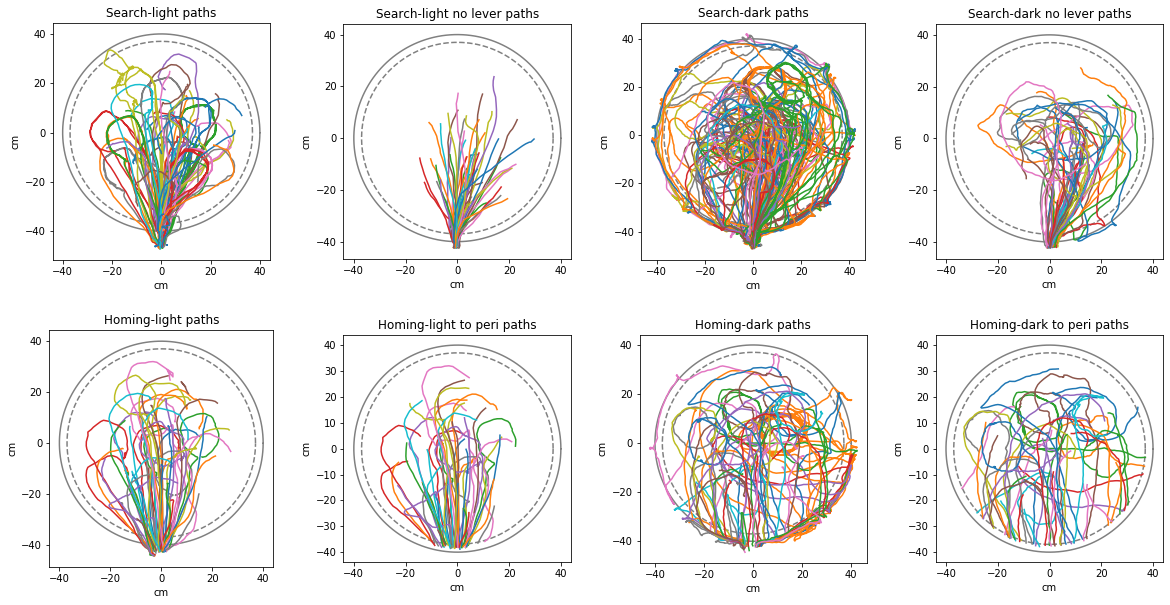

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# to plot the arena circle
arena=np.arange(start=0,stop=2*np.pi,step=0.02)
arenaRadiusProportionToPeri=0.925
arenaRadius = 40
 
fig, axes = plt.subplots(2,4,figsize=(20,10))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

# what needs to be applied to all graphs
for ax in axes.flatten():
    ax.set_aspect('equal', adjustable='box')
    ax.plot(np.cos(arena)*arenaRadius,np.sin(arena)*arenaRadius,label="Arena",color="gray")
    ax.plot(np.cos(arena)*arenaRadius*arenaRadiusProportionToPeri,np.sin(arena)*arenaRadius*arenaRadiusProportionToPeri,label="Periphery",color="gray",linestyle='dashed')
    ax.set_xlabel("cm")
    ax.set_ylabel("cm")
    
axes[0,0].set_title("Search-light paths")
axes[0,1].set_title("Search-light no lever paths")
axes[0,2].set_title("Search-dark paths")
axes[0,3].set_title("Search-dark no lever paths")

axes[1,0].set_title("Homing-light paths")
axes[1,1].set_title("Homing-light to peri paths")
axes[1,2].set_title("Homing-dark paths")
axes[1,3].set_title("Homing-dark to peri paths")


lightTrials = [t for t in ses.trialList if t.light=="light" and t.valid]
darkTrials =  [t for t in ses.trialList if t.light=="dark" and t.valid]

for t in lightTrials:
    axes[0,0].plot(t.searchTotalNavPath.pPose[:,0],t.searchTotalNavPath.pPose[:,1])

for t in lightTrials:
    axes[0,1].plot(t.searchArenaNoLeverNavPath.pPose[:,0],t.searchArenaNoLeverNavPath.pPose[:,1])

for t in darkTrials:
    axes[0,2].plot(t.searchTotalNavPath.pPose[:,0],t.searchTotalNavPath.pPose[:,1])
    
for t in darkTrials:
    axes[0,3].plot(t.searchArenaNoLeverNavPath.pPose[:,0],t.searchArenaNoLeverNavPath.pPose[:,1])

for t in lightTrials:
    axes[1,0].plot(t.homingTotalNavPath.pPose[:,0],t.homingTotalNavPath.pPose[:,1])

for t in lightTrials:
    axes[1,1].plot(t.homingPeriNoLeverNavPath.pPose[:,0],t.homingPeriNoLeverNavPath.pPose[:,1])

for t in darkTrials:
    axes[1,2].plot(t.homingTotalNavPath.pPose[:,0],t.homingTotalNavPath.pPose[:,1])

for t in darkTrials:
    axes[1,3].plot(t.homingPeriNoLeverNavPath.pPose[:,0],t.homingPeriNoLeverNavPath.pPose[:,1])

    
    
fn = ses.fileBase+"_trialPaths.pdf"
plt.savefig(fn)
print(fn)